# Sales Data Analysis of a Yarn Store
#### Name : Maharani Ayu Putri Irawan
#### NIM : 16520134
#### University : ITB
#### Start date : November 7th 2020
#### Dataset source : own (SalesAnalysisData.csv)

### Problem Framing
#### 1. Problem statement : the need to maintain stock of a store
#### 2. Objective : to find time, and specific item to be restocked the most to satisfy customer demand
#### 3. Scope : Yarn Store
#### 4. Data : recorded sales data of a year (2017)

In [183]:
import pandas as pd
import os
import matplotlib.pyplot as plot

### Data Observation

In [184]:
df = pd.read_csv("/content/SalesAnalysisData.csv")
df.head()

,tglsj,barang,code_wr,qttsj,Price
0,2/3/2017,Bordir Rayon 150 gr,1050,18,25000
1,2/3/2017,Bordir Rayon 150 gr,1179,24,25000
2,2/3/2017,Bordir Rayon 150 gr,1180,24,25000
3,2/3/2017,Bordir Rayon 150 gr,1188,30,25000
4,2/3/2017,Bordir Rayon 150 gr,1191,6,25000


##### Data type Casting

In [185]:
df['code_wr'] = df['code_wr'].astype(str)
df.head()

,tglsj,barang,code_wr,qttsj,Price
0,2/3/2017,Bordir Rayon 150 gr,1050,18,25000
1,2/3/2017,Bordir Rayon 150 gr,1179,24,25000
2,2/3/2017,Bordir Rayon 150 gr,1180,24,25000
3,2/3/2017,Bordir Rayon 150 gr,1188,30,25000
4,2/3/2017,Bordir Rayon 150 gr,1191,6,25000


In [186]:
df.describe()

,qttsj,Price
count,23988.000000,23988.000000
mean,9.307404,17705.331833
std,27.853253,6627.400130
min,1.000000,8500.000000
25%,2.000000,10500.000000
50%,3.000000,18500.000000
75%,6.000000,25000.000000
max,1500.000000,25000.000000


### Data Preparation
##### Data Cleaning

In [187]:
# check if there are empty columns
empty = df[df.isna().any(axis=1)]

# remove empty columns
df = df.dropna(how='any')
df.head()

,tglsj,barang,code_wr,qttsj,Price
0,2/3/2017,Bordir Rayon 150 gr,1050,18,25000
1,2/3/2017,Bordir Rayon 150 gr,1179,24,25000
2,2/3/2017,Bordir Rayon 150 gr,1180,24,25000
3,2/3/2017,Bordir Rayon 150 gr,1188,30,25000
4,2/3/2017,Bordir Rayon 150 gr,1191,6,25000


##### Data Processing

In [188]:
#adding month column
df.loc[df["tglsj"].str[1:2] == '/', 'Month'] = df["tglsj"].str[0:1]  
df.loc[df["tglsj"].str[1:2] != '/', 'Month'] = df["tglsj"].str[0:2]

df['Month'] = df['Month'].astype('int32')
df.head()

,tglsj,barang,code_wr,qttsj,Price,Month
0,2/3/2017,Bordir Rayon 150 gr,1050,18,25000,2
1,2/3/2017,Bordir Rayon 150 gr,1179,24,25000,2
2,2/3/2017,Bordir Rayon 150 gr,1180,24,25000,2
3,2/3/2017,Bordir Rayon 150 gr,1188,30,25000,2
4,2/3/2017,Bordir Rayon 150 gr,1191,6,25000,2


In [189]:
# adding sales column
df['Sales'] = df['qttsj']*df['Price']
df.head()

,tglsj,barang,code_wr,qttsj,Price,Month,Sales
0,2/3/2017,Bordir Rayon 150 gr,1050,18,25000,2,450000
1,2/3/2017,Bordir Rayon 150 gr,1179,24,25000,2,600000
2,2/3/2017,Bordir Rayon 150 gr,1180,24,25000,2,600000
3,2/3/2017,Bordir Rayon 150 gr,1188,30,25000,2,750000
4,2/3/2017,Bordir Rayon 150 gr,1191,6,25000,2,150000


In [190]:
df.describe()

,qttsj,Price,Month,Sales
count,23988.000000,23988.000000,23988.000000,2.398800e+04
mean,9.307404,17705.331833,7.828998,1.672825e+05
std,27.853253,6627.400130,2.912522,4.298944e+05
min,1.000000,8500.000000,2.000000,8.500000e+03
25%,2.000000,10500.000000,5.000000,2.450000e+04
50%,3.000000,18500.000000,8.000000,5.000000e+04
75%,6.000000,25000.000000,10.000000,1.500000e+05
max,1500.000000,25000.000000,12.000000,1.500000e+07


### Model Development
#### 1. Searching the peak of sales over the year

In [191]:
total = df.groupby('Month').sum()
total.head(12)

,qttsj,Price,Sales
Month,,,
2,5351,11868500,93055000
3,15077,29342000,264575500
4,15460,30922000,278834000
5,23891,45668500,452260000
6,10685,23290500,188239000
7,17071,37313500,307096500
8,25441,50784000,478339000
9,27871,46902000,465966500
10,31739,51294500,561310000


In [192]:
total['Sales'].head()

Month
2     93055000
3    264575500
4    278834000
5    452260000
6    188239000
Name: Sales, dtype: int64

Text(0, 0.5, 'Sales (in hundred million Rupiahs)')

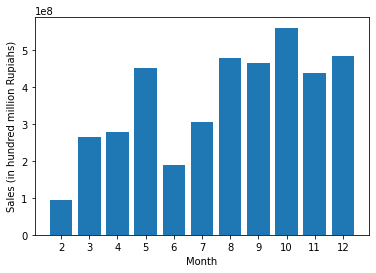

In [193]:
month = range(2,13)
plot.bar(month, total['Sales'])
plot.xticks(month)
plot.xlabel('Month')
plot.ylabel('Sales (in hundred million Rupiahs)')

##### Insight 1: It can be concluded that the least sales were on February, and reached its peak on October. It makes sense since February is the start of the sales, and the sales increased along with the time. October has the least holiday over 2017 since the only holiday exist in October 2017 happened on Sunday.

#### 2. Searching for best-selling item

In [194]:
df.head()

,tglsj,barang,code_wr,qttsj,Price,Month,Sales
0,2/3/2017,Bordir Rayon 150 gr,1050,18,25000,2,450000
1,2/3/2017,Bordir Rayon 150 gr,1179,24,25000,2,600000
2,2/3/2017,Bordir Rayon 150 gr,1180,24,25000,2,600000
3,2/3/2017,Bordir Rayon 150 gr,1188,30,25000,2,750000
4,2/3/2017,Bordir Rayon 150 gr,1191,6,25000,2,150000


In [195]:
item = df.groupby('barang').sum()
item.head(50)

,qttsj,Price,Month,Sales
barang,,,,
Bordir Polyester 150 gr,24569,12390000,6617,368535000
Bordir Rayon 150 gr,95398,220475000,69118,2384950000
Bordir Rayon 70 gr,12913,12410000,5642,219521000
Jahit 20/2 5000 yds,3786,2832000,1720,45432000
Jahit 20/3 5000 yds,18,13000,8,234000
Jahit 40/2 5000 yds,54705,53730000,42170,547050000
Jahit 40/2p 500 yds,4905,50449500,20768,90742500
Metalic Black 125 gr,474,696000,362,6873000
Metalic Gepeng Mas,3166,263500,293,26911000


In [196]:
numofrow = range(1, len(item)+1)
print(numofrow)

range(1, 17)


In [197]:
item['qttsj'].head(16)

barang
Bordir Polyester 150 gr    24569
Bordir Rayon 150 gr        95398
Bordir Rayon 70 gr         12913
Jahit 20/2 5000 yds         3786
Jahit 20/3 5000 yds           18
Jahit 40/2 5000 yds        54705
Jahit 40/2p 500 yds         4905
Metalic Black 125 gr         474
Metalic Gepeng Mas          3166
Metalic Gepeng Warna        2001
Metalic Mas 125 gr          1372
Metalic Warna 125 gr         457
Obras 180 gr Nat            1490
Obras 180 gr Warna         12224
Obras 500 gr Nat            2197
Obras 500 gr Warna          3591
Name: qttsj, dtype: int64

Text(0, 0.5, 'Number of item sold')

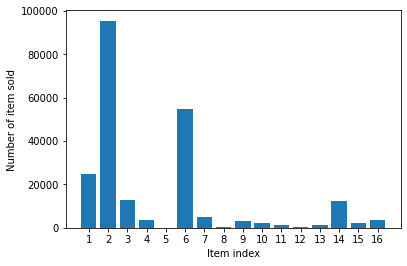

In [198]:
plot.bar(numofrow, item['qttsj'])
plot.xticks(numofrow)
plot.xlabel('Item index')
plot.ylabel('Number of item sold')

In [199]:
maks = item['qttsj'].idxmax() 
print(maks)

Bordir Rayon 150 gr


In [200]:
mins = item['qttsj'].idxmin()
print(mins)

Jahit 20/3 5000 yds


##### Insight 2 : Item with most sales on this data is 'Bordir Rayon 150 gr. In the other hand, the least sold item is 'Jahit 20/3 5000 yds'. This is logical since Rayon Embroidery Yarn has wide-range use while Sewing Yarn with thickness 20/3 are only used to sew leather and jeans.

#### 3. Searching for best-selling color code

In [201]:
maxcode = df.groupby('code_wr').sum()
maxcode.head()

,qttsj,Price,Month,Sales
code_wr,,,,
10,120,29000,17,1740000
1001,1547,453500,295,16484000
1002,10,8500,10,85000
1003,1819,168500,127,15544000
1004,6,17000,9,102000


In [202]:
numrowmax = len(maxcode)
print(numrowmax)

997


In [203]:
maxcode.head(numrowmax)

,qttsj,Price,Month,Sales
code_wr,,,,
10,120,29000,17,1740000
1001,1547,453500,295,16484000
1002,10,8500,10,85000
1003,1819,168500,127,15544000
1004,6,17000,9,102000
...,...,...,...,...
613,12,20000,14,120000
620,150,10000,9,1500000
7,17,43500,29,246500


In [204]:
codemax = maxcode['qttsj'].idxmax()
print(codemax)

500


##### Insight 3 : Best-selling yarn color is code 500

### Problem Solution
#### 1. Restock will be needed the most on months having less holiday and many national events. In example, 2017 has least holiday on October.
#### 2. The item that needs special attention in term of restock is Embroidery Yarn
#### 3. Since color code 500 is the most demanding item, it needs to be regularly restocked